In [1]:
import random


def d5():
    result = []
    for i in range(5):
        result.append(random.choice([-1, 0, 1]))
    return result

def d10():
    result = []
    for i in range(10):
        result.append(random.choice([-1, 0, 1]))
    return result

def not_blank(input):
    return sum([1 for i in input if i != 0])

def positive(input):
    return sum([1 for i in input if i == 1])

def negative(input):
    return sum([1 for i in input if i == -1])

In [2]:
n=10000000
sample = [d5() for i in range(n)]
total = [sum(i) for i in sample]
non_blank = [not_blank(i) for i in sample]
positives = [positive(i) for i in sample]
negatives = [negative(i) for i in sample]
blank = [5-i for i in non_blank]
data = {"non_blank": non_blank, "total": total, "blank": blank,
        "negatives": negatives, "positives": positives}


In [3]:
import pandas as pd
df = pd.DataFrame(data)

In [4]:
df.corr()

,non_blank,total,blank,negatives,positives
non_blank,1.000000,0.000349,-1.000000,0.499831,0.500284
total,0.000349,1.000000,-0.000349,-0.865949,0.866036
blank,-1.000000,-0.000349,1.000000,-0.499831,-0.500284
negatives,0.499831,-0.865949,-0.499831,1.000000,-0.499885
positives,0.500284,0.866036,-0.500284,-0.499885,1.000000


<Axes: ylabel='Frequency'>

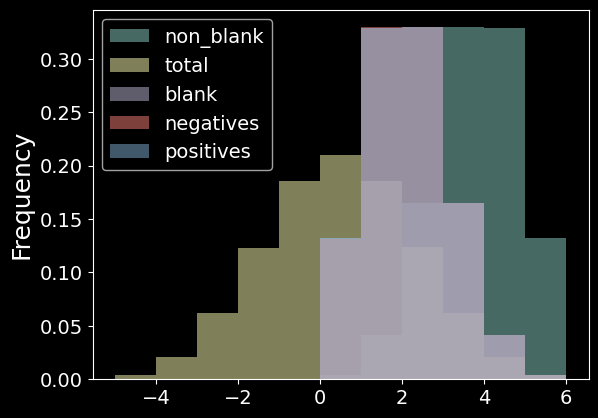

In [6]:
df.plot.hist(bins=[-5,-4,-3,-2,-1,0,1,2,3,4,5,6], density=True, alpha=0.5)

array([[<Axes: title={'center': 'non_blank'}>,
        <Axes: title={'center': 'total'}>],
       [<Axes: title={'center': 'blank'}>,
        <Axes: title={'center': 'negatives'}>],
       [<Axes: title={'center': 'positives'}>, <Axes: >]], dtype=object)

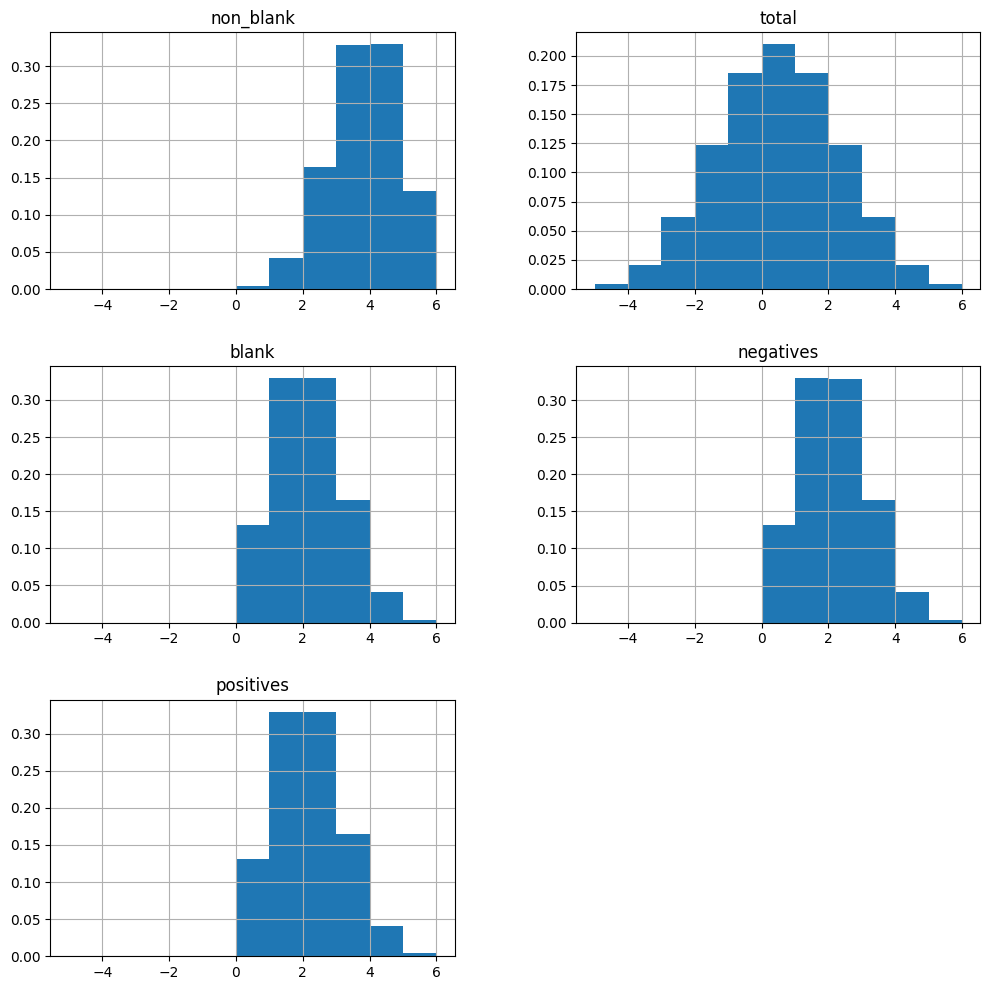

In [5]:
df.hist(density=True, bins = [-5,-4,-3,-2,-1,0,1,2,3,4,5,6], figsize = (12,12))

In [34]:
df["non_blank"].value_counts()/n

non_blank
4    0.329289
3    0.329205
2    0.164548
5    0.131731
1    0.041116
0    0.004111
Name: count, dtype: float64

In [22]:
(1/3)**5
1/0.1317

7.59301442672741

In [8]:
sample_d10 = [d10() for i in range(n)]
total_d10 = [sum(i) for i in sample_d10]

In [9]:
df_10=pd.DataFrame(total_d10)
std_dev=df_10.std()

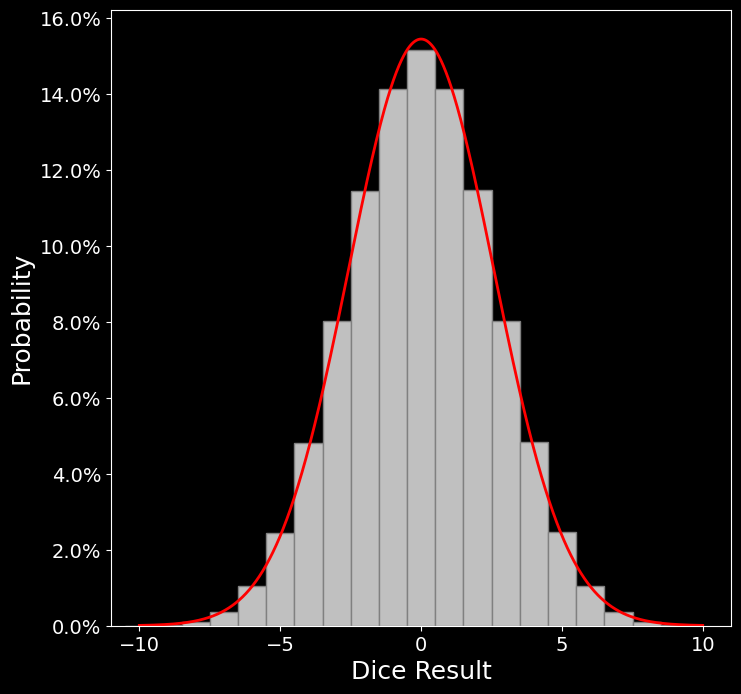

In [45]:

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.stats import norm
plt.style.use('dark_background')

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

ax = df_10.hist(bins=range(-10,11,1),density=True, align="left", color="silver",
                edgecolor="gray", figsize = (8,8), grid=False)
a = ax[0][0]
a.set_title("", fontsize=BIGGER_SIZE)
a.set_xlabel("Dice Result")
a.set_ylabel("Probability")
a.set_xticks([-10,-5,0,5,10])
a.set_xlim([-11,11])
a.yaxis.set_major_formatter(mtick.PercentFormatter(1))
a.set_facecolor('black')



x = [i/100 for i in range(-10*100,10*100,1)]
y = norm.pdf(x,0,std_dev)

ax[0][0].plot(x,y, linewidth=2 , color = "red")

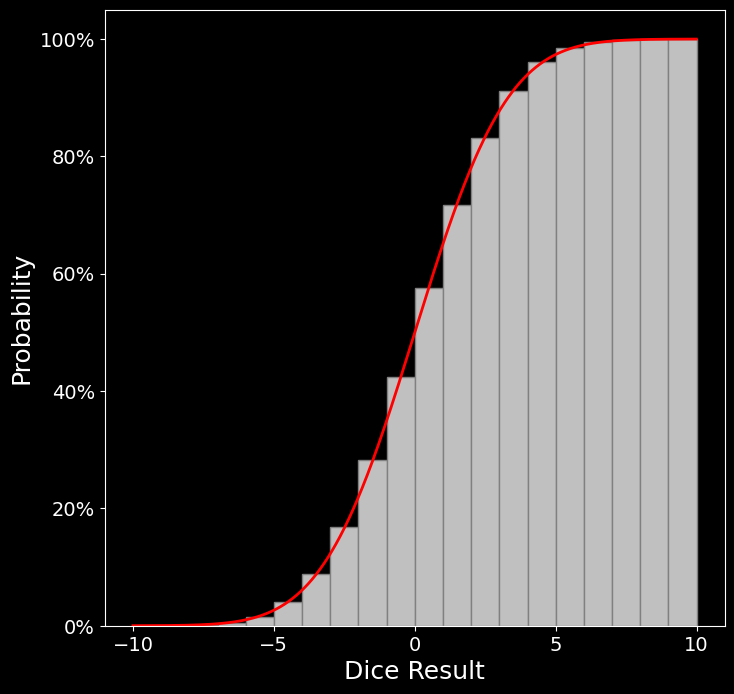

In [49]:
ax = df_10.hist(bins=range(-10,11,1),density=True, align="mid", color="silver",
                edgecolor="gray", figsize = (8,8), grid=False, cumulative=True)
a = ax[0][0]
a.set_title("", fontsize=BIGGER_SIZE)
a.set_ylabel("Probability")
a.set_xlabel("Dice Result")
a.set_xticks([-10,-5,0,5,10])
a.set_xlim([-11,11])
a.yaxis.set_major_formatter(mtick.PercentFormatter(1))
a.set_facecolor('black')



x = [i/100 for i in range(-10*100,10*100,1)]
y = norm.cdf(x,0,std_dev)

ax[0][0].plot(x,y, linewidth=2 , color = "red")

In [17]:
std_dev

0    2.581155
dtype: float64

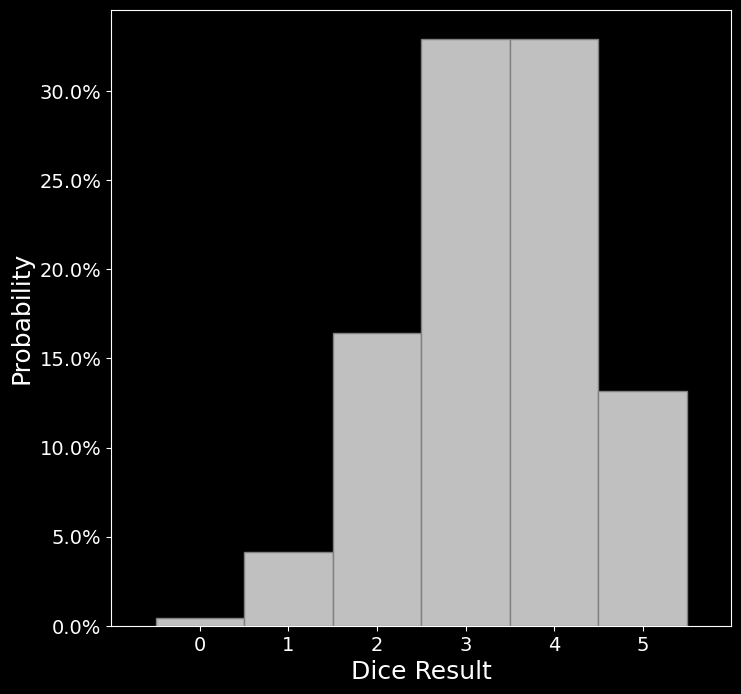

In [52]:


ax = df["non_blank"].hist(bins=range(0,7,1),density=True, align="left", color="silver",
                edgecolor="gray", figsize = (8,8), grid=False)
ax.set_title("", fontsize=BIGGER_SIZE)
ax.set_ylabel("Probability")
ax.set_xlabel("Dice Result")
ax.set_xticks([0,1,2,3,4,5])
ax.set_xlim([-1,6])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))


#x = [i/100 for i in range(0*100,6*100,1)]
#y = norm.pdf(x,0,std_dev)

#ax.plot(x,y, linewidth=2 , color = "red")